In [1]:
# NAME - ADARSH MODI
# ROLL NO - 19IM30004
# OHM LAB PROJECT
# OPTIMISATION OF BANK LENDING DECISIONS
# IMPLEMENTATION OF GA

# Importing all the libraries required
import pandas as pd
import random
import numpy as np
from numpy.random import rand
from numpy.random import randint

#Data and parameter's values taken from the reference paper

cust_data = [[10  ,0.021  ,'AAA' ,0.0002],
             [25  ,0.022  ,'BB'  ,0.0058],
             [4   ,0.021  ,'A'   ,0.001],
             [11  ,0.027  ,'AA'  ,0.0003],
             [18  ,0.025  ,'BBB' ,0.0024],
             [3   ,0.026  ,'AAA' ,0.0002],
             [17  ,0.023  ,'BB'  ,0.0058],
             [15  ,0.021  ,'AAA' ,0.0002],
             [9   ,0.028  ,'A'   ,0.001],
             [10  ,0.022  ,'A'   ,0.001]]

total_iterations = 60
N = 10
pop_size = 8
cross_prob = 0.8
mut_prob = 0.006
D = 60
K = 0.15


In [2]:
# Calculate fitness values of the given chromosome

def calculate_fitness_value(chromosome):
    
  total_fitness_val  = -0.009*D
  for i in range(0,10):
    # if bit is 1 the value is added to total_fitness_val
    if chromosome[i] == 1:
      total_fitness_val += cust_data[i][1] * cust_data[i][0] + 0.01 * ((1-K)*D - cust_data[i][0]) - 2*cust_data[i][3]    
    
  return (total_fitness_val)

In [3]:
# Roulette wheel selection method for selecting the parents

def roulette_wheel_selection(population, num): 
    
    selected_population = [] 
    
    #calculating fitness values of population array
    fitness_array = [calculate_fitness_value(i) for i in population]
    total_fitness = float(sum(fitness_array))
    
    #calculating probability of selection of each fitness values 
    relative_fitness_array = [float(fitness/total_fitness) for fitness in fitness_array]
    
    #calculating cumulative probability array
    cumulative_prob_array = np.cumsum(relative_fitness_array)
    
    #generating random number to select chromosomes
    rand_array = [random.random() for i in range(len(population))]
    
    #finding the indices to select
    sel_indices = cumulative_prob_array.searchsorted(rand_array)
    
    for i in sel_indices:
        selected_population.append(population[i])    
    
    return selected_population    

In [4]:
#Genetic validation check

def check_validation(chromosome):
  totsum = 0

  for i in range(0,10):
        
    # if bit is 1 the value is added to totsum
    if chromosome[i] == 1:
      totsum = totsum + cust_data[i][0] 
    
  return (totsum)

In [5]:
# Function for generating the initial population
def generate_initial_population(num, N):
    
    initial_population=[]
    
    while(len(initial_population) < num):
        
        # Genrating intial binary string 
        x = [random.randint(0, 1) for i in range(N)] 
        
         #validation check
        if check_validation(x) <= (1-K)*D:  
             initial_population.append(x)
        else : 
             continue
                
    return initial_population

In [6]:
#Function for Single point crossover with crossover probability = cross_prob
def crossover(par1, par2, cross_prob):
    
  #initialising ch1
  child1 = par1.copy() 
  #initialising ch2
  child2 = par2.copy() 
    
  #crossover condition
  if rand() < cross_prob: 
    # randomly selecting a point for crossover
    pt = randint(1, len(par1)-2)
    
    #formation of both the children
    child1 = par1[:pt] + par2[pt:]
    child2 = par2[:pt] + par1[pt:]
    
  #check_validation check for child 1
  if check_validation(child1) > (1-K)*D : 
    child1 = par1
  #check_validation check for child 2
  if check_validation(child2) > (1-K)*D :
    child2 = par2
    
  return [child1, child2]

In [7]:
#Function for Mutation with Mutation probability = mut_prob
def mutation(chromosome, mut_prob):
    
  for i in range(len(chromosome)):    
    # Mutation condition
    if rand() < mut_prob:
      #check_validation check
      if check_validation(chromosome) <= ((1-K)*D) : 
        #flipping the bit
        if chromosome[i] == 1:
            chromosome[i] = 0
        else :
            chromosome[i] = 1

In [8]:
def GA(obj_function, N, total_iterations, pop_size, cross_prob, mut_prob):
    max_fit = []     
    # Generating initial population
    pop = generate_initial_population(pop_size,N)
    best_eval = obj_function(pop[0])
    best = 0
    best_vals = [obj_function(c) for c in pop]
    max_fit.append(max(best_vals))
    
    for gen in range(total_iterations):
        # calculating the best fitness value for each population
        best_vals = [obj_function(c) for c in pop]
        for i in range(pop_size):
          if best_vals[i] > best_eval:
            best_eval = best_vals[i]
            best = pop[i]
        # roulette wheel function called
        selected = roulette_wheel_selection(pop,pop_size)
        #crossover and mutation
        children = list()
        for i in range(0, pop_size, 2):
          par1 = selected[i]
          par2 = selected[i+1]
          for c in crossover(par1, par2, cross_prob):
            mutation(c, mut_prob)
            children.append(c)
        pop = children
        max_fit.append(max(best_vals))
        
    print('Implemented the GA algorithm successfully---->')
    print(best_eval)
    print(best)
    return max_fit

In [9]:
# finding the max_fit value by calling the GA function
max_fit = GA(calculate_fitness_value, N, total_iterations, pop_size, cross_prob, mut_prob)

Implemented the GA algorithm successfully---->
3.4328
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0]


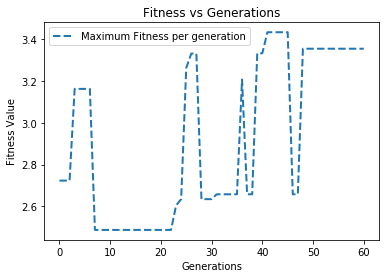

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(max_fit, label="Maximum Fitness per generation")
plt.legend()
plt.title("Fitness vs Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness Value")
plt.show()